In [ ]:
FastICA are the building block to construct algorithms like Cocktail-Party used for speech tagging


# Blind source separation using FastICA


An example of estimating sources from noisy data.

`ICA` is used to estimate sources given noisy measurements.
Imagine 3 instruments playing simultaneously and 3 microphones
recording the mixed signals. ICA is used to recover the sources
ie. what is played by each instrument. Importantly, PCA fails
at recovering our `instruments` since the related signals reflect
non-Gaussian processes.




In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals', 
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

Automatically created module for IPython interactive environment


<Figure size 640x480 with 4 Axes>

In [10]:
import librosa as lr

In [11]:
data,rate=lr.load("file.mp3")

In [27]:
S

array([[ 0.495126  ,  0.07841108, -1.31840023],
       [ 0.64019598,  1.34570272, -1.94657351],
       [ 0.28913069,  0.9500949 , -1.646886  ],
       ...,
       [-0.38561943, -0.71624672,  1.34043406],
       [-0.50777458, -1.24052539,  1.74176784],
       [-0.5550078 , -0.90265774, -1.54534953]])

In [28]:
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)


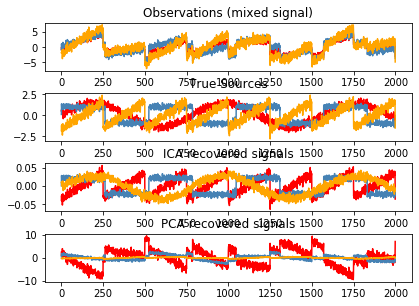

In [29]:
plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals', 
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

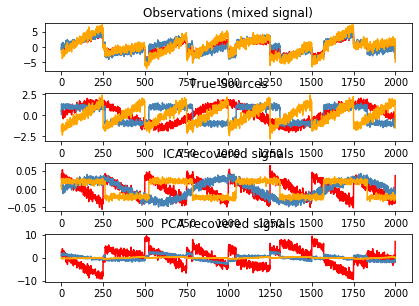

In [19]:
plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals', 
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

In [4]:
X

array([[-0.74486315, -0.91401507, -1.81570038],
       [ 0.03932519,  1.06492993, -1.58715033],
       [-0.40766041,  0.39786915, -1.90998106],
       ...,
       [ 0.23856791, -0.28486909,  1.38619226],
       [-0.00653213, -0.99317023,  1.48134842],
       [-3.00301507, -3.62816891, -4.8258685 ]])

In [5]:
S

array([[ 0.495126  ,  0.07841108, -1.31840023],
       [ 0.64019598,  1.34570272, -1.94657351],
       [ 0.28913069,  0.9500949 , -1.646886  ],
       ...,
       [-0.38561943, -0.71624672,  1.34043406],
       [-0.50777458, -1.24052539,  1.74176784],
       [-0.5550078 , -0.90265774, -1.54534953]])

In [6]:
S_

array([[ 2.87708979e-02,  8.79360931e-03,  6.72769974e-05],
       [ 4.13792541e-02,  1.09602569e-02,  2.81369526e-02],
       [ 3.55855216e-02,  3.31819018e-03,  1.95600983e-02],
       ...,
       [-2.86329778e-02, -1.28941811e-02, -1.61803583e-02],
       [-3.69211829e-02, -1.53470102e-02, -2.77023733e-02],
       [ 3.63842825e-02, -1.30408996e-02, -2.15447139e-02]])

In [7]:
H

array([[ 2.48210019,  0.45830595, -0.25192014],
       [ 0.86272641,  1.85327346, -0.37481838],
       [ 1.6629138 ,  1.54102229, -0.26905807],
       ...,
       [-0.53569968, -1.0264737 ,  0.29888929],
       [-0.09489576, -1.63449318,  0.38149333],
       [ 7.11412668,  0.23544543, -0.10475611]])